#### 29/07/2020

Working with NASDAQ Stock Data

In this final chapter, you’ll try your hand at working with real-world NASDAQ stock data as you learn how to interpret new data, create masks to filter data, and visualize your findings with plots.

In [1]:
import pandas as pd

In [2]:
alphabet = pd.read_csv("HistoricalQuotes3.txt")

In [3]:
alphabet.head()

,date,close,volume,open,high,low
0,2019/08/02,1196.32,1745450.0,1203.00,1209.500,1190.00
1,2019/08/01,1211.78,1771271.0,1217.63,1236.298,1207.00
2,2019/07/31,1218.20,1997999.0,1224.87,1234.910,1208.18
3,2019/07/30,1228.00,1430775.0,1227.00,1236.910,1225.32
4,2019/07/29,1241.84,2069127.0,1242.50,1248.995,1230.20


In [4]:
#alphabet = alphabet.drop([0], axis = 0)

In [5]:
alphabet.dtypes

date       object
close     float64
volume    float64
open      float64
high      float64
low       float64
dtype: object

In [ ]:
#converting values from object to int
alphabet["volume"] = pd.to_numeric(alphabet["volume"], downcast="integer")


In [ ]:
#converting values from object to float
to_float = ["close", "open", "high", "low"]

for i in to_float:
    alphabet[i] = pd.to_numeric(alphabet[i], downcast = "float")


In [7]:
# Get stats for all numeric columns
alphabet.describe()

,close,volume,open,high,low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,612.300264,2.278235e+06,612.388284,617.484990,606.824462
std,311.029653,1.256103e+06,310.956806,313.720854,308.055488
min,220.278500,5.211410e+05,221.410100,223.417600,219.046000
25%,309.344400,1.518603e+06,309.113350,312.043200,306.689875
50%,550.887500,1.976994e+06,551.100000,556.012500,546.590650
75%,830.720000,2.619222e+06,831.457500,837.762500,826.200125
max,1296.200000,1.480348e+07,1289.120000,1296.975000,1271.710000


In [9]:
alphabet.describe(include="object")

,date
count,2518
unique,2518
top,2015/11/17
freq,1


In [10]:
# Stats with percentiles for %30, %50, and %60
alphabet.describe(percentiles=[.3, .5, .6])

,close,volume,open,high,low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,612.300264,2.278235e+06,612.388284,617.484990,606.824462
std,311.029653,1.256103e+06,310.956806,313.720854,308.055488
min,220.278500,5.211410e+05,221.410100,223.417600,219.046000
30%,326.846980,1.612094e+06,326.648420,329.873510,323.824180
50%,550.887500,1.976994e+06,551.100000,556.012500,546.590650
60%,643.910000,2.185960e+06,644.413600,654.982000,633.561460
max,1296.200000,1.480348e+07,1289.120000,1296.975000,1271.710000


In [11]:
#Filtering stock data.
# Mask for large enough daily high
high_mask = alphabet.high > 500

# Filter using the mask
alphabet.loc[high_mask].head()

,date,close,volume,open,high,low
0,2019/08/02,1196.32,1745450.0,1203.00,1209.500,1190.00
1,2019/08/01,1211.78,1771271.0,1217.63,1236.298,1207.00
2,2019/07/31,1218.20,1997999.0,1224.87,1234.910,1208.18
3,2019/07/30,1228.00,1430775.0,1227.00,1236.910,1225.32
4,2019/07/29,1241.84,2069127.0,1242.50,1248.995,1230.20


In [12]:
# Mask for specific volume
volume_mask = alphabet.volume == 1771271

# Filter using the mask
alphabet.loc[volume_mask]

,date,close,volume,open,high,low
1,2019/08/01,1211.78,1771271.0,1217.63,1236.298,1207.0


In [13]:
# Mask rows whose volume is not 1997999
volume_mask = alphabet.volume != 1997999

# Filter using the mask
alphabet.loc[volume_mask].head()

,date,close,volume,open,high,low
0,2019/08/02,1196.32,1745450.0,1203.00,1209.500,1190.00
1,2019/08/01,1211.78,1771271.0,1217.63,1236.298,1207.00
3,2019/07/30,1228.00,1430775.0,1227.00,1236.910,1225.32
4,2019/07/29,1241.84,2069127.0,1242.50,1248.995,1230.20
5,2019/07/26,1245.22,6060795.0,1228.00,1268.394,1228.00


### Selecting data from data range using DATETIME

In [14]:
alphabet.dtypes

date       object
close     float64
volume    float64
open      float64
high      float64
low       float64
dtype: object

In [15]:
import datetime

In [24]:
teste = alphabet.iloc[0, 0]

In [25]:
teste = datetime.datetime.strptime(teste, "%Y/%m/%d")

In [27]:
print(teste)

2019-08-02 00:00:00


In [29]:
#converting from object to datetime
i = 0

for x in alphabet.date:
    alphabet.iloc[i, 0] = datetime.datetime.strptime(alphabet.iloc[i, 0], "%Y/%m/%d")
    i +=1


In [30]:
start_date = datetime.datetime(2019, 8, 2)
end_date = datetime.datetime(2019, 7, 29)

In [31]:
#Selecting data from data range.
# Calculate the mask for one week
mask = (end_date <= alphabet['date']) & (alphabet['date'] <= start_date)

# Use the mask to get the data for one week
df = alphabet[mask]

In [32]:
# Look at result
print(df)

                  date    close     volume     open      high      low
0  2019-08-02 00:00:00  1196.32  1745450.0  1203.00  1209.500  1190.00
1  2019-08-01 00:00:00  1211.78  1771271.0  1217.63  1236.298  1207.00
2  2019-07-31 00:00:00  1218.20  1997999.0  1224.87  1234.910  1208.18
3  2019-07-30 00:00:00  1228.00  1430775.0  1227.00  1236.910  1225.32
4  2019-07-29 00:00:00  1241.84  2069127.0  1242.50  1248.995  1230.20


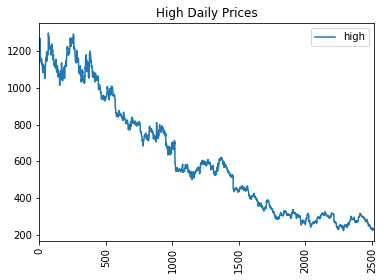

In [36]:
#Making a line plot
# Plot the daily high price
alphabet.plot(y='high', rot=90, title='High Daily Prices')

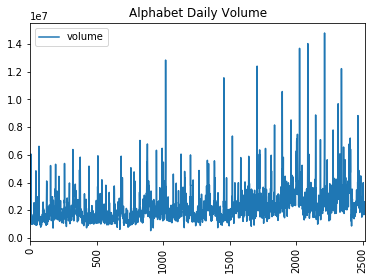

In [37]:
#Create a line plot of the daily trading volume using the date as the x-axis
# Plot daily trade volume
alphabet.plot(y='volume', rot=90, title='Alphabet Daily Volume')

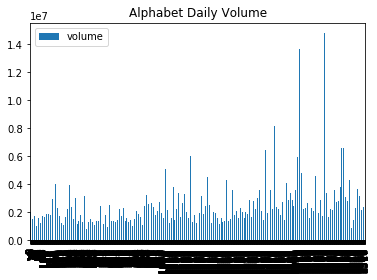

In [38]:
# Plot the volume using a bar plot.
alphabet.plot(y='volume', kind='bar', title='Alphabet Daily Volume')

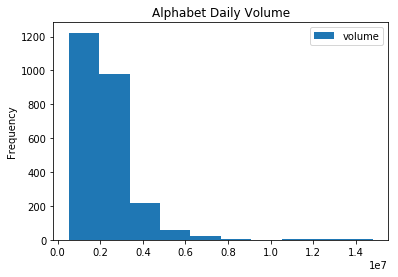

In [41]:
# Create a histogram of the daily volume.
alphabet.plot(y='volume', kind='hist', title='Alphabet Daily Volume')

In [42]:
import matplotlib.pyplot as plt

In [43]:
import numpy as np

In [45]:
volume = list(alphabet['volume'])

In [46]:
volume = np.array(volume)

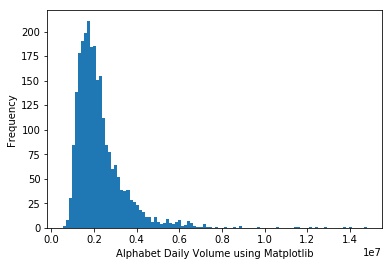

In [48]:
# Plot histogram 
plt.hist(volume, bins = 100)

# Add x-label
plt.xlabel('Alphabet Daily Volume using Matplotlib')

# Add y-label
plt.ylabel('Frequency')

# Show plot
plt.show()